In [132]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

In [133]:
#Create a Model Class that inherits nn.Module

class Model(nn.Module):
    #Input layer (4 features flower) 
    #--> hidden layer1 (n neurons) --> H2 (n) 
    #--> output (3 types of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out =  nn.Linear(h2,out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x



In [134]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [137]:
# Change last colum from intergers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [138]:
# Train test split! set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [139]:
X = X.values
y = y.values

In [140]:
from sklearn.model_selection import train_test_split


In [141]:
# Train test split with sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)


In [142]:

# Convert X to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [143]:
# Convert y to float tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [144]:
# Set the criterion of model to mersure the error
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr = learning rate 
# if error does not go down after a bunch of iterations(epochs),
# lower our learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [145]:
# Train our model
# Epochs? (one run thru all the trainingg data in our network)
epochs = 2000
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first value
    loss = criterion(y_pred, y_train) # predicted values vs the y_train
    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    # Do some back propagations
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165624648332596
Epoch: 80 and loss: 0.08606516569852829
Epoch: 90 and loss: 0.06522615253925323
Epoch: 100 and loss: 0.05286873131990433
Epoch: 110 and loss: 0.04508010298013687
Epoch: 120 and loss: 0.03979312255978584
Epoch: 130 and loss: 0.03596429154276848
Epoch: 140 and loss: 0.03302798792719841
Epoch: 150 and loss: 0.030512521043419838
Epoch: 160 and loss: 0.027733495458960533
Epoch: 170 and loss: 0.024612072855234146
Epoch: 180 and loss: 0.021672405302524567
Epoch: 190 and loss: 0.019319692626595497
Epoch: 200 and loss: 0.017491867765784264
Epoch: 210 and loss: 0.016043035313487053
Epoch: 220 and loss: 0.014838052913546562
Epoch: 230 and loss: 0.013799230568110943
Epoch: 240 and loss: 0.012

Text(0.5, 0, 'Epoch')

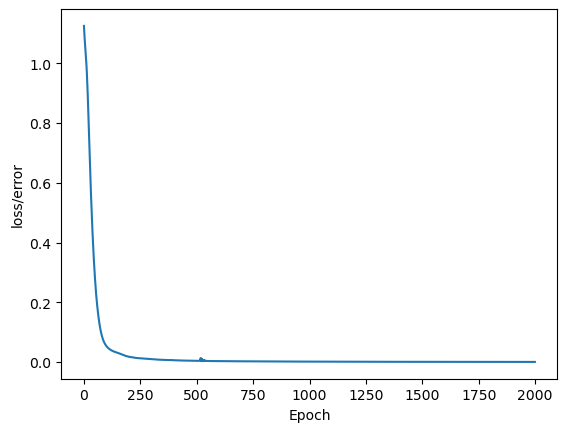

In [146]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [147]:
# Evaluate model on test data set (balidate model on test set)
with torch.no_grad(): # Basically turn off back propagation
    y_eval = model.forward(X_test) # X_test are features and y_eval predictions
    loss = criterion(y_eval,y_test)

In [148]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = 'Versicolor'
        else: 
            x = 'Virginica'



        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1} {str(y_val)} \t {x} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct out of {len(X_test)}')


1 tensor([-12.4805,  -2.9652,  24.6886]) 	 Virginica 	 2
2 tensor([-16.1016,  -9.4414,  37.2595]) 	 Virginica 	 2
3 tensor([-18.5919,  -9.9842,  41.8451]) 	 Virginica 	 2
4 tensor([ 20.0517,  34.5092, -26.9834]) 	 Versicolor 	 1
5 tensor([-15.5963,  -6.3379,  33.2230]) 	 Virginica 	 2
6 tensor([ 34.4656,  48.3861, -47.3411]) 	 Versicolor 	 1
7 tensor([-9.8049,  0.9733, 20.4942]) 	 Virginica 	 2
8 tensor([ 21.2115,  35.8659, -28.8054]) 	 Versicolor 	 1
9 tensor([-14.1691,  -4.0528,  28.5455]) 	 Virginica 	 2
10 tensor([-17.2296, -10.2248,  39.9023]) 	 Virginica 	 2
11 tensor([-5.3892,  5.7242, 13.3991]) 	 Virginica 	 2
12 tensor([ 143.7588,  130.5425, -177.9993]) 	 Setosa 	 0
13 tensor([ 130.5813,  118.3149, -161.5934]) 	 Setosa 	 0
14 tensor([ 40.2876,  50.3598, -54.0076]) 	 Versicolor 	 1
15 tensor([ 126.1264,  116.6581, -156.8263]) 	 Setosa 	 0
16 tensor([ 1.2833, 13.3884,  2.9005]) 	 Virginica 	 1
17 tensor([ 131.9224,  120.1853, -163.4690]) 	 Setosa 	 0
18 tensor([-9.0595,  1.1857,

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [ ]:
with torch.no_grad():
    print(model(newer_iris))

In [151]:
# Save our NN model
torch.save(model.state_dict(), 'iris_model.pt')

In [152]:
# Load the saved
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [153]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)